# Stock Market Analysis and Forecasting Demo

This notebook demonstrates data preprocessing, model training, forecasting, and portfolio optimization for TSLA, SPY, and BND stocks.

We will use the following classes from our project files:
- `StockDataProcessor` for Task 1
- `ModelTrainer` for Task 2
- `MarketForecaster` for Task 3
- `PortfolioOptimizer` for Task 4

In [1]:
import sys
sys.path.append('../scripts')

from data_preprocessing import StockDataProcessor
from time_series_models import ModelTrainer
from forecasting import MarketForecaster
from portfolio_optimization import PortfolioOptimizer

## Task 1: Data Preprocessing and Exploration

In this step, we will load and clean the stock data, perform exploratory data analysis, and compute some basic statistics.

In [2]:
# Initialize the data processor
tickers = ['TSLA', 'SPY', 'BND']
start_date = '2015-01-01'
end_date = '2023-01-01'
processor = StockDataProcessor(tickers, start_date, end_date)

# Download and clean data
processor.download_data()
processor.clean_data()
processor.basic_stats()  # Display basic statistics

[*********************100%***********************]  3 of 3 completed

Ticker          BND          SPY         TSLA
count   2014.000000  2014.000000  2014.000000
mean      69.841845   273.957764    88.662189
std        5.313989    85.302953   108.557913
min       62.453262   157.328613     9.578000
25%       65.801754   198.774590    16.217167
50%       67.369488   254.202042    21.881333
75%       74.876822   349.701157   182.904999
max       79.578094   458.720337   409.970001


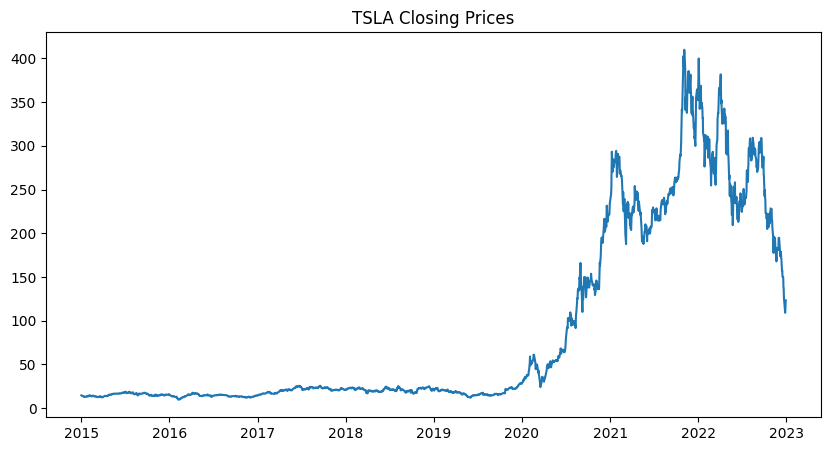

In [3]:
# Calculate daily returns and plot closing prices
processor.calculate_daily_returns()
processor.plot_closing_prices()

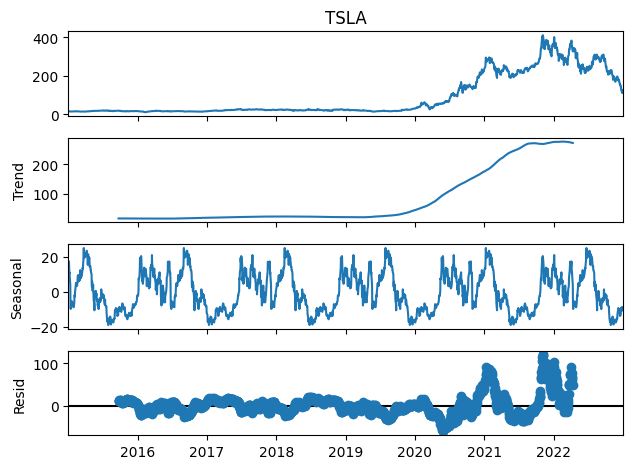

Sharpe Ratio: -0.23240196291637608


In [4]:
# Analyze volatility and decompose seasonality
rolling_mean, rolling_std = processor.analyze_volatility()
processor.decompose_seasonality()

# Calculate Sharpe Ratio
sharpe_ratio = processor.calculate_sharpe_ratio()
print(f'Sharpe Ratio: {sharpe_ratio}')

## Task 2: Model Training

In this step, we will train models for predicting future prices. We use ARIMA, SARIMA, and LSTM models to forecast TSLA stock prices.

c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A

Epoch 1/10
49/49 [==============================] - 7s 53ms/step - loss: 0.0060
Epoch 2/10
49/49 [==============================] - 2s 47ms/step - loss: 7.9809e-04
Epoch 3/10
49/49 [==============================] - 2s 48ms/step - loss: 7.2353e-04
Epoch 4/10
49/49 [==============================] - 2s 44ms/step - loss: 6.3007e-04
Epoch 5/10
49/49 [==============================] - 3s 57ms/step - loss: 6.5352e-04
Epoch 6/10
49/49 [==============================] - 2s 46ms/step - loss: 6.4345e-04
Epoch 7/10
49/49 [==============================] - 3s 51ms/step - loss: 5.2215e-04
Epoch 8/10
49/49 [==============================] - 3s 57ms/step - loss: 4.1883e-04
Epoch 9/10
49/49 [==============================] - 2s 42ms/step - loss: 4.0548e-04
Epoch 10/10
49/49 [==============================] - 2s 43ms/step - loss: 5.1257e-04


c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1/1 [==============================] - 0s 16ms/step
ARIMA MAE: 68.86445422149541
SARIMA MAE: 54.75083317571043
1/1 [==============================] - 0s 31ms/step


c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported inde

1/1 [==============================] - 0s 33ms/step
LSTM MAE: 49.37455408744717


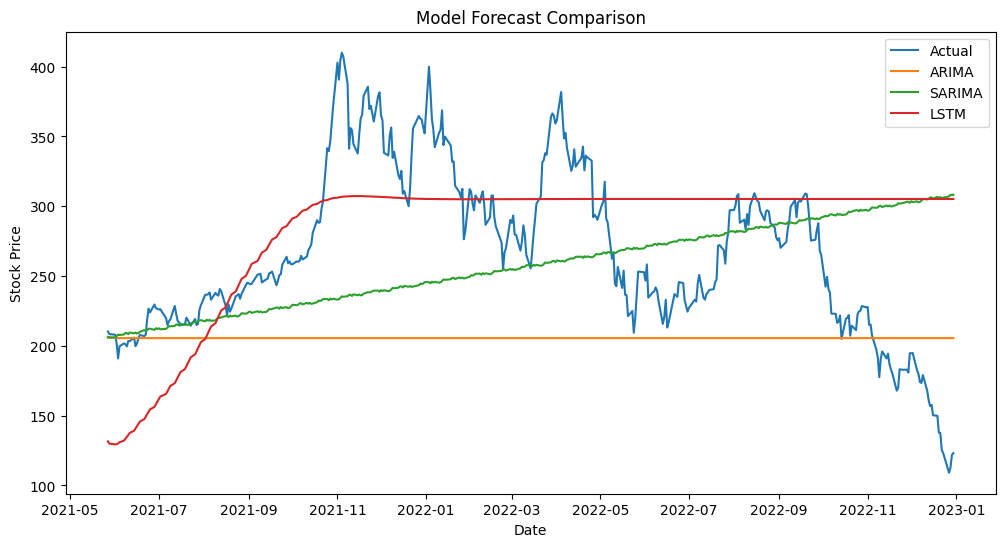

In [5]:
# Initialize model trainer
trainer = ModelTrainer(processor.data['TSLA'])

# Train models
arima_model = trainer.train_arima(order=(5, 1, 0))
sarima_model = trainer.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Prepare data and train LSTM model
X_train, y_train = trainer.prepare_lstm_data(sequence_length=60)
lstm_model = trainer.train_lstm(X_train, y_train, units=50, epochs=10, batch_size=32)

# Forecast with each model
arima_preds = arima_model.forecast(steps=len(trainer.test))
sarima_preds = sarima_model.forecast(steps=len(trainer.test))
lstm_preds = trainer.forecast_lstm(lstm_model)

# Evaluate models
print("ARIMA MAE:", trainer.evaluate_model(arima_model, model_type='arima', metric='mae'))
print("SARIMA MAE:", trainer.evaluate_model(sarima_model, model_type='sarima', metric='mae'))
print("LSTM MAE:", trainer.evaluate_model(lstm_model, model_type='lstm', metric='mae'))

# Plot forecast comparison
trainer.plot_forecasts(arima_preds, sarima_preds, lstm_preds)

## Task 3: Forecasting Future Market Trends

We use the trained LSTM model to forecast future prices and analyze the trends and risks.

In [7]:
import pandas as pd
# Verify that 'TSLA' column data is extracted correctly, with datetime index
if isinstance(trainer.data, pd.DataFrame):
    # Ensure data is taken from the 'TSLA' column and index is set to datetime format
    tsla_data = trainer.data['TSLA']
    if not isinstance(tsla_data.index, pd.DatetimeIndex):
        tsla_data.index = pd.to_datetime(trainer.data.index)
else:
    # If trainer.data is already a Series, ensure it has datetime index
    tsla_data = trainer.data
    if not isinstance(tsla_data.index, pd.DatetimeIndex):
        tsla_data.index = pd.to_datetime(tsla_data.index)

c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: x and y must have same first dimension, but have shapes (179,) and (180,)

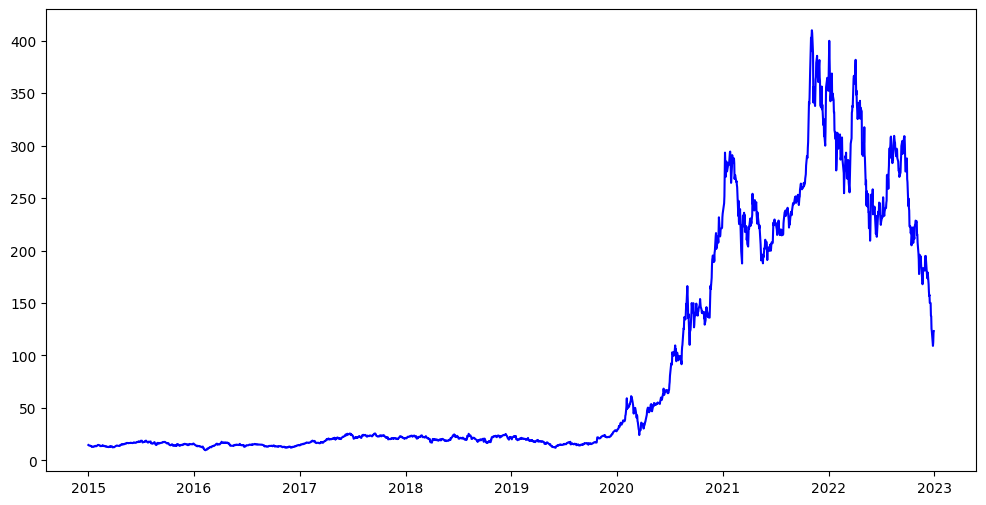

In [ ]:
# Initialize forecaster with the chosen model and data
forecaster = MarketForecaster(model=arima_model, data=trainer.data['TSLA'], model_type='arima')

# Generate forecast and confidence intervals
predictions, conf_int = forecaster.forecast(steps=180)

# Plot forecast
forecaster.plot_forecast(predictions, conf_int)

# Interpret forecast results
forecaster.interpret_results(predictions, conf_int)

## Task 4: Portfolio Optimization

Using the forecasted data from Task 3, we will optimize a sample portfolio consisting of TSLA, SPY, and BND.

In [ ]:
# Generate forecasted returns for each asset (for demonstration, we will assume some returns)
forecasted_returns = processor.daily_returns[['TSLA', 'SPY', 'BND']]

# Initialize portfolio optimizer
optimizer = PortfolioOptimizer(forecasted_returns)

# Optimize portfolio
optimal_weights = optimizer.optimize_portfolio()

# Display portfolio weights
print('Optimal Portfolio Weights:', optimal_weights)

Optimal Portfolio Weights: [0.20322016 0.32762059 0.46915925]


## Conclusion

This notebook demonstrated how to preprocess data, train forecasting models, generate future predictions, and optimize a portfolio. Each task was handled in a modular fashion, with classes that can be reused for similar analyses.